In [52]:
# importation
import numpy as np
import time
from sklearn.linear_model import SGDClassifier
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from keras.utils import np_utils
import matplotlib as mpl
import matplotlib.pyplot as plt

In [53]:
# Chargement des données 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train=X_train.reshape(60000, 784)
X_test=X_test.reshape(10000, 784)
X_train=X_train.astype('float32')  
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

<function matplotlib.pyplot.show(*args, **kw)>

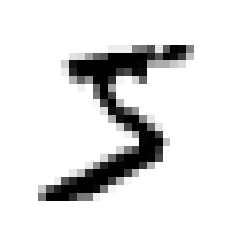

In [54]:
# Pour l'entrainement et la prédiction de mon modèle je ne chois que des données portant sur le chiffre '5'
Y_train_5=(Y_train==5)  
Y_test_5=(Y_test==5)

# affiche d'une image
chiffre=X_train[0]
chiffre_image=chiffre.reshape(28,28)
plt.imshow(chiffre_image, cmap="binary")
plt.axis("off")
plt.show

In [55]:
# On définit un modèle de classifieur basé sur la déscnete du Gradient
model=SGDClassifier(random_state=42)
model.fit(X_train,Y_train_5)

# Prédiction du modèle sur un chiffre
model.predict([chiffre])

array([ True])

In [56]:
# Evaluation du modèle par la validation croisée
cross_val_score(model,X_train, Y_train_5, cv=5, scoring="accuracy")

array([0.97666667, 0.97291667, 0.9755    , 0.96816667, 0.97425   ])

In [57]:
# Matrice de confusion
chiffres_predits=cross_val_predict(model, X_train,Y_train_5)
confusion_matrix(Y_train_5,chiffres_predits)

array([[54093,   486],
       [ 1104,  4317]])